In [575]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



In [576]:
titanic_train = pd.read_csv(r"C:\Users\Ameen\ML PROJECTS\Titanic survival\train.csv")
titanic_test = pd.read_csv(r"C:\Users\Ameen\ML PROJECTS\Titanic survival\test.csv")

In [577]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [578]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [579]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [580]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [581]:
titanic_train['Pclass'].isnull().sum()

0

In [582]:
df = titanic_train.copy()

In [583]:
print(df['Name'])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [584]:
df['Name'].str.split(' ').apply(lambda x : x[1] ).value_counts().index

Index(['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.', 'y', 'Impe,',
       'Planke,', 'Major.', 'Col.', 'Mlle.', 'Gordon,', 'Shawah,',
       'Melkebeke,', 'the', 'der', 'Jonkheer.', 'Steen,', 'Ms.', 'Capt.',
       'Pelsmaeker,', 'Mulder,', 'Mme.', 'Walle,', 'Carlo,', 'Billiard,',
       'Cruyssen,', 'Messemaeker,', 'Velde,', 'Don.'],
      dtype='object')

In [585]:
def name_clean(df):
    df['Name'] = df['Name'].str.split(' ').apply(lambda x : x[1] )
    titles =  [ 'Dr.', 'Rev.', 'y', 'Impe,',
           'Planke,', 'Major.', 'Col.', 'Mlle.', 'Gordon,', 'Shawah,',
           'Melkebeke,', 'the', 'der', 'Jonkheer.', 'Steen,', 'Ms.', 'Capt.',
           'Pelsmaeker,', 'Mulder,', 'Mme.', 'Walle,', 'Carlo,', 'Billiard,',
           'Cruyssen,', 'Messemaeker,', 'Velde,', 'Don.' , 'Khalil,' , 'Brito,' , 'Palmquist,']
    df['Name'].replace(titles , 'others' , inplace = True)
    return df

In [586]:
df_train = titanic_train.copy()
name_clean(df_train).Name.value_counts()

Mr.        502
Miss.      179
Mrs.       121
others      49
Master.     40
Name: Name, dtype: int64

In [587]:
df_test = titanic_test.copy()
name_clean(df_test).Name.value_counts()

Mr.        234
Miss.       77
Mrs.        70
Master.     19
others      18
Name: Name, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

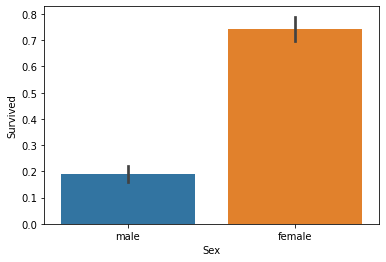

In [588]:
sns.barplot(data = df , x = "Sex" , y = "Survived")

In [589]:
df['Age'].isnull().sum()

177

In [590]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [591]:
df['Age'].isnull().sum()

0

In [592]:
df['Age'] = pd.cut(df['Age'] , 5)

In [593]:
df_Age = df['Age'].value_counts()

<AxesSubplot:xlabel='Age', ylabel='Survived'>

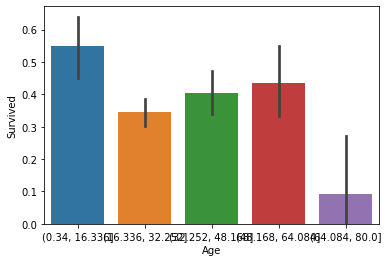

In [594]:
sns.barplot(data = df , x = "Age" , y = "Survived" )

In [595]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,"(16.336, 32.252]",1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(32.252, 48.168]",1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,"(16.336, 32.252]",0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(32.252, 48.168]",1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,"(32.252, 48.168]",0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,"(16.336, 32.252]",0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,"(16.336, 32.252]",0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,"(16.336, 32.252]",1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,"(16.336, 32.252]",0,0,111369,30.0000,C148,C


In [596]:
def family_clean(df):
    df['Family'] = df['SibSp'] + df['Parch']
    df.drop(["SibSp" , "Parch"] , axis = 1 , inplace = True)
    return df
df = family_clean(df)

<AxesSubplot:xlabel='Family', ylabel='Survived'>

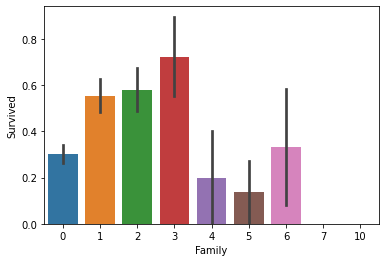

In [597]:
sns.barplot(data = df  , x = 'Family' , y = 'Survived')

In [598]:
def ticket_clean(df):
    df.drop("Ticket" , axis = 1 , inplace = True)
    return df


In [599]:
def fare_clean(df):
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Fare'] = pd.cut(df['Fare'],5)
    return df
df = fare_clean(df)
df['Fare'].value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [600]:
df['Cabin'].fillna('N',inplace = True)
df['Cabin'].apply(lambda x:x[0])
df['Cabin'].value_counts()

N              687
B96 B98          4
G6               4
C23 C25 C27      4
F33              3
              ... 
A24              1
B50              1
E38              1
B38              1
E40              1
Name: Cabin, Length: 148, dtype: int64

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

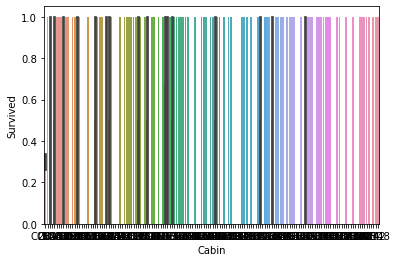

In [601]:
sns.barplot(data = df , x = 'Cabin' , y = 'Survived')